In [2]:
import copy
import operator
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from numpy import array
pd.options.mode.chained_assignment=None

df_proposals = pd.read_csv('data/2022-11-19.csv')
df_proposals.head(20)

,opportunity,propsId,updatedAt,organization,anonymousProponentName,challengeScore,scenarioScore,priceScore,teamquestions,status,...,questionsWeight,codeChallengeWeight,scenarioWeight,priceWeight,orgsId,city,region,country,maxQuestionScore,questionsOppVersion
0,04003a5f-f609-469f-91bb-f3c6ac56bed7,a24d6763-6b40-48be-9eea-a44fd1d1ea7e,2020-09-11 16:51:01.868000 +00:00,77dd6b0e-76a5-4dfb-aeee-fc4a37e98f02,Proponent 2,97.00,35.00,100.000000,221.00,NOT_AWARDED,...,25,30,35,10,77dd6b0e-76a5-4dfb-aeee-fc4a37e98f02,Victoria,BC,Canada,425,4f0c30c7-fa26-4171-aed2-6ad36e063853
1,04003a5f-f609-469f-91bb-f3c6ac56bed7,6e078383-7f17-48c9-8beb-05373b5e571d,2020-09-11 16:51:01.868000 +00:00,a414d09a-6be0-4203-9d10-b5b79bc03368,Proponent 1,89.00,51.00,98.461540,281.00,AWARDED,...,25,30,35,10,a414d09a-6be0-4203-9d10-b5b79bc03368,Victoria,BC,Canada,425,4f0c30c7-fa26-4171-aed2-6ad36e063853
2,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,f97765ac-edea-4beb-a807-c9df3a2500f3,2020-09-14 20:07:11.850000 +00:00,445eb43c-71e8-49a1-8878-1bd57f60436a,Proponent 1,76.30,NaN,NaN,14.00,EVALUATED_CODE_CHALLENGE,...,25,35,35,5,445eb43c-71e8-49a1-8878-1bd57f60436a,Victoria,BC,Canada,25,85cbfcdf-c8d7-427c-8404-62c59b741d1c
3,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,a722d4ef-eafe-4ba9-b20e-b29ea4639b9f,2020-11-25 20:12:21.261000 +00:00,211b188b-4510-45a7-a406-56b904ea8548,Proponent 3,98.90,91.00,100.000000,23.00,AWARDED,...,25,35,35,5,211b188b-4510-45a7-a406-56b904ea8548,Victoria,BC,Canada,25,85cbfcdf-c8d7-427c-8404-62c59b741d1c
4,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,6150cf20-05d9-4845-b565-f1c3705e4472,2020-09-14 20:06:32.546000 +00:00,c1a0ffbe-2194-45e1-b9f2-44c8c55d883c,Proponent 4,0.00,NaN,NaN,8.00,EVALUATED_CODE_CHALLENGE,...,25,35,35,5,c1a0ffbe-2194-45e1-b9f2-44c8c55d883c,Vancouver,BC,Canada,25,85cbfcdf-c8d7-427c-8404-62c59b741d1c
5,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,0cafeaf6-5f27-48a2-8591-d276bd65f609,2020-09-14 20:06:50.951000 +00:00,3f497cb0-1672-4fc3-9c3d-f82621481c30,Proponent 2,0.00,NaN,NaN,13.00,EVALUATED_CODE_CHALLENGE,...,25,35,35,5,3f497cb0-1672-4fc3-9c3d-f82621481c30,Calgary,Alberta,Canada,25,85cbfcdf-c8d7-427c-8404-62c59b741d1c
6,5e32d776-a4b6-48f3-adb5-8fd6c38462cb,48f13f73-6b8e-40b9-baf2-ba276a0e578e,2020-09-04 22:15:28.123000 +00:00,2bdea71a-44b2-4ac3-ba9c-6eced8b969ce,Proponent 6,100.00,62.00,90.625000,73.50,NOT_AWARDED,...,40,0,50,10,2bdea71a-44b2-4ac3-ba9c-6eced8b969ce,Burnaby,BC,Canada,100,168268e9-9198-495a-a9eb-807f00b0d541
7,5e32d776-a4b6-48f3-adb5-8fd6c38462cb,25a08444-50c2-48bc-b5f1-1602f09bdc01,2020-09-04 22:15:28.123000 +00:00,73064d46-e6a0-4dec-bcf6-d26b10b190fc,Proponent 2,100.00,81.00,100.000000,77.75,NOT_AWARDED,...,40,0,50,10,73064d46-e6a0-4dec-bcf6-d26b10b190fc,Vancouver,British Columbia,Canada,100,168268e9-9198-495a-a9eb-807f00b0d541
8,5e32d776-a4b6-48f3-adb5-8fd6c38462cb,27ac6918-42b4-49cf-a4af-565effb120f9,2020-09-04 22:15:28.123000 +00:00,0602bc56-f822-4748-9928-207486f36222,Proponent 4,100.00,87.00,89.230770,88.25,AWARDED,...,40,0,50,10,0602bc56-f822-4748-9928-207486f36222,Victoria,BC,Canada,100,168268e9-9198-495a-a9eb-807f00b0d541
9,5e32d776-a4b6-48f3-adb5-8fd6c38462cb,d31b45d7-5c4c-4e48-9dc3-42d5f1a53908,2020-08-25 01:51:02.548000 +00:00,d9e6e8c8-db8c-4ad5-a829-0ae3c442bb6a,Proponent 3,NaN,NaN,NaN,64.50,EVALUATED_QUESTIONS,...,40,0,50,10,d9e6e8c8-db8c-4ad5-a829-0ae3c442bb6a,Burnaby,BC,Canada,100,168268e9-9198-495a-a9eb-807f00b0d541


In [3]:
df_proposals.shape

(149, 28)

In [4]:
## see if there are any null values to determine if rows can be eliminated
df_proposals.isna().sum()

opportunity                0
propsId                    0
updatedAt                  0
organization               0
anonymousProponentName    12
challengeScore            91
scenarioScore             98
priceScore                98
teamquestions             13
status                     0
id                         0
updatedAt.1                0
versionsId                 0
versionsCreatedAt          0
totalMaxBudget             0
minTeamMembers             6
mandatorySkills            0
optionalSkills            31
questionsWeight            0
codeChallengeWeight        0
scenarioWeight             0
priceWeight                0
orgsId                     0
city                       0
region                     0
country                    0
maxQuestionScore           0
questionsOppVersion        0
dtype: int64

In [5]:

# replace instances of NaN with 0 in columns with calculations
df_proposals['teamquestions']=df_proposals['teamquestions'].fillna(0)
df_proposals['challengeScore']=df_proposals['challengeScore'].fillna(0)
df_proposals['scenarioScore']=df_proposals['scenarioScore'].fillna(0)
df_proposals['priceScore']=df_proposals['priceScore'].fillna(0)
df_proposals['optionalSkills']=df_proposals['optionalSkills'].fillna('')

df_proposals.isna().sum()


opportunity                0
propsId                    0
updatedAt                  0
organization               0
anonymousProponentName    12
challengeScore             0
scenarioScore              0
priceScore                 0
teamquestions              0
status                     0
id                         0
updatedAt.1                0
versionsId                 0
versionsCreatedAt          0
totalMaxBudget             0
minTeamMembers             6
mandatorySkills            0
optionalSkills             0
questionsWeight            0
codeChallengeWeight        0
scenarioWeight             0
priceWeight                0
orgsId                     0
city                       0
region                     0
country                    0
maxQuestionScore           0
questionsOppVersion        0
dtype: int64

In [6]:


# use the combined weight and score to come up with a calculated score for each phase and total
df_proposals['tq_calculated']=(df_proposals['teamquestions'] / df_proposals['maxQuestionScore']) * 100 * df_proposals['questionsWeight'] / 100
df_proposals['cc_calculated']=df_proposals['codeChallengeWeight'] * df_proposals['challengeScore'] / 100
df_proposals['ts_calculated']=df_proposals['scenarioWeight'] * df_proposals['scenarioScore'] / 100
df_proposals['p_calculated']=df_proposals['priceWeight'] * df_proposals['priceScore'] / 100
df_proposals['total_score']=df_proposals['cc_calculated'] + df_proposals['ts_calculated'] + df_proposals['p_calculated'] + df_proposals['tq_calculated']
df_proposals

,opportunity,propsId,updatedAt,organization,anonymousProponentName,challengeScore,scenarioScore,priceScore,teamquestions,status,...,city,region,country,maxQuestionScore,questionsOppVersion,tq_calculated,cc_calculated,ts_calculated,p_calculated,total_score
0,04003a5f-f609-469f-91bb-f3c6ac56bed7,a24d6763-6b40-48be-9eea-a44fd1d1ea7e,2020-09-11 16:51:01.868000 +00:00,77dd6b0e-76a5-4dfb-aeee-fc4a37e98f02,Proponent 2,97.0,35.0,100.00000,221.00,NOT_AWARDED,...,Victoria,BC,Canada,425,4f0c30c7-fa26-4171-aed2-6ad36e063853,13.000000,29.100,12.25,10.000000,64.350000
1,04003a5f-f609-469f-91bb-f3c6ac56bed7,6e078383-7f17-48c9-8beb-05373b5e571d,2020-09-11 16:51:01.868000 +00:00,a414d09a-6be0-4203-9d10-b5b79bc03368,Proponent 1,89.0,51.0,98.46154,281.00,AWARDED,...,Victoria,BC,Canada,425,4f0c30c7-fa26-4171-aed2-6ad36e063853,16.529412,26.700,17.85,9.846154,70.925566
2,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,f97765ac-edea-4beb-a807-c9df3a2500f3,2020-09-14 20:07:11.850000 +00:00,445eb43c-71e8-49a1-8878-1bd57f60436a,Proponent 1,76.3,0.0,0.00000,14.00,EVALUATED_CODE_CHALLENGE,...,Victoria,BC,Canada,25,85cbfcdf-c8d7-427c-8404-62c59b741d1c,14.000000,26.705,0.00,0.000000,40.705000
3,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,a722d4ef-eafe-4ba9-b20e-b29ea4639b9f,2020-11-25 20:12:21.261000 +00:00,211b188b-4510-45a7-a406-56b904ea8548,Proponent 3,98.9,91.0,100.00000,23.00,AWARDED,...,Victoria,BC,Canada,25,85cbfcdf-c8d7-427c-8404-62c59b741d1c,23.000000,34.615,31.85,5.000000,94.465000
4,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,6150cf20-05d9-4845-b565-f1c3705e4472,2020-09-14 20:06:32.546000 +00:00,c1a0ffbe-2194-45e1-b9f2-44c8c55d883c,Proponent 4,0.0,0.0,0.00000,8.00,EVALUATED_CODE_CHALLENGE,...,Vancouver,BC,Canada,25,85cbfcdf-c8d7-427c-8404-62c59b741d1c,8.000000,0.000,0.00,0.000000,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,f508d747-8877-46f8-8818-59f71a65416a,1e8d4d99-dff4-4665-85bb-60f1707bc9e4,2022-05-30 19:30:12.006000 +00:00,697ff7cd-b6b3-44df-82ac-73dcc17258f7,Proponent 19,0.0,0.0,0.00000,14.00,NOT_AWARDED,...,Vancouver,BC,Canada,25,5bcbcf7f-0d9b-4906-b033-6f128bb58bb7,14.000000,0.000,0.00,0.000000,14.000000
145,f508d747-8877-46f8-8818-59f71a65416a,5fcabcf4-6fe5-4c71-ab7f-0a38897bcb41,2022-05-30 19:30:12.006000 +00:00,3f497cb0-1672-4fc3-9c3d-f82621481c30,Proponent 12,0.0,0.0,0.00000,11.00,NOT_AWARDED,...,Calgary,Alberta,Canada,25,5bcbcf7f-0d9b-4906-b033-6f128bb58bb7,11.000000,0.000,0.00,0.000000,11.000000
146,f508d747-8877-46f8-8818-59f71a65416a,e810f974-6a0c-4fd4-9884-594d761ae430,2022-05-30 19:30:12.006000 +00:00,19597999-ef73-48d4-ac56-ff125e20a035,Proponent 13,0.0,0.0,0.00000,12.00,NOT_AWARDED,...,Calgary,Alberta,Canada,25,5bcbcf7f-0d9b-4906-b033-6f128bb58bb7,12.000000,0.000,0.00,0.000000,12.000000
147,f508d747-8877-46f8-8818-59f71a65416a,f31ded1b-432f-4f7a-afeb-2211ce7dc5fc,2022-05-30 19:30:12.006000 +00:00,77dd6b0e-76a5-4dfb-aeee-fc4a37e98f02,Proponent 5,0.0,0.0,0.00000,16.75,NOT_AWARDED,...,Victoria,BC,Canada,25,5bcbcf7f-0d9b-4906-b033-6f128bb58bb7,16.750000,0.000,0.00,0.000000,16.750000


In [7]:
# see if there are any outliers that verifies calculations
df_proposals['total_score'].describe()

count    149.000000
mean      35.630674
std       32.939279
min        0.000000
25%       11.562500
50%       16.133333
75%       75.962937
max       94.465000
Name: total_score, dtype: float64

<AxesSubplot:>

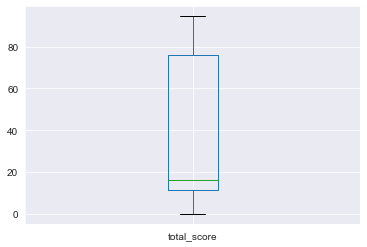

In [8]:
df_proposals.boxplot(column='total_score')

In [9]:
# drop rows that contain zero for total score
df_props = df_proposals.loc[(df_proposals['total_score'] != 0)]
df_props

,opportunity,propsId,updatedAt,organization,anonymousProponentName,challengeScore,scenarioScore,priceScore,teamquestions,status,...,city,region,country,maxQuestionScore,questionsOppVersion,tq_calculated,cc_calculated,ts_calculated,p_calculated,total_score
0,04003a5f-f609-469f-91bb-f3c6ac56bed7,a24d6763-6b40-48be-9eea-a44fd1d1ea7e,2020-09-11 16:51:01.868000 +00:00,77dd6b0e-76a5-4dfb-aeee-fc4a37e98f02,Proponent 2,97.0,35.0,100.00000,221.00,NOT_AWARDED,...,Victoria,BC,Canada,425,4f0c30c7-fa26-4171-aed2-6ad36e063853,13.000000,29.100,12.25,10.000000,64.350000
1,04003a5f-f609-469f-91bb-f3c6ac56bed7,6e078383-7f17-48c9-8beb-05373b5e571d,2020-09-11 16:51:01.868000 +00:00,a414d09a-6be0-4203-9d10-b5b79bc03368,Proponent 1,89.0,51.0,98.46154,281.00,AWARDED,...,Victoria,BC,Canada,425,4f0c30c7-fa26-4171-aed2-6ad36e063853,16.529412,26.700,17.85,9.846154,70.925566
2,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,f97765ac-edea-4beb-a807-c9df3a2500f3,2020-09-14 20:07:11.850000 +00:00,445eb43c-71e8-49a1-8878-1bd57f60436a,Proponent 1,76.3,0.0,0.00000,14.00,EVALUATED_CODE_CHALLENGE,...,Victoria,BC,Canada,25,85cbfcdf-c8d7-427c-8404-62c59b741d1c,14.000000,26.705,0.00,0.000000,40.705000
3,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,a722d4ef-eafe-4ba9-b20e-b29ea4639b9f,2020-11-25 20:12:21.261000 +00:00,211b188b-4510-45a7-a406-56b904ea8548,Proponent 3,98.9,91.0,100.00000,23.00,AWARDED,...,Victoria,BC,Canada,25,85cbfcdf-c8d7-427c-8404-62c59b741d1c,23.000000,34.615,31.85,5.000000,94.465000
4,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,6150cf20-05d9-4845-b565-f1c3705e4472,2020-09-14 20:06:32.546000 +00:00,c1a0ffbe-2194-45e1-b9f2-44c8c55d883c,Proponent 4,0.0,0.0,0.00000,8.00,EVALUATED_CODE_CHALLENGE,...,Vancouver,BC,Canada,25,85cbfcdf-c8d7-427c-8404-62c59b741d1c,8.000000,0.000,0.00,0.000000,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,f508d747-8877-46f8-8818-59f71a65416a,1e8d4d99-dff4-4665-85bb-60f1707bc9e4,2022-05-30 19:30:12.006000 +00:00,697ff7cd-b6b3-44df-82ac-73dcc17258f7,Proponent 19,0.0,0.0,0.00000,14.00,NOT_AWARDED,...,Vancouver,BC,Canada,25,5bcbcf7f-0d9b-4906-b033-6f128bb58bb7,14.000000,0.000,0.00,0.000000,14.000000
145,f508d747-8877-46f8-8818-59f71a65416a,5fcabcf4-6fe5-4c71-ab7f-0a38897bcb41,2022-05-30 19:30:12.006000 +00:00,3f497cb0-1672-4fc3-9c3d-f82621481c30,Proponent 12,0.0,0.0,0.00000,11.00,NOT_AWARDED,...,Calgary,Alberta,Canada,25,5bcbcf7f-0d9b-4906-b033-6f128bb58bb7,11.000000,0.000,0.00,0.000000,11.000000
146,f508d747-8877-46f8-8818-59f71a65416a,e810f974-6a0c-4fd4-9884-594d761ae430,2022-05-30 19:30:12.006000 +00:00,19597999-ef73-48d4-ac56-ff125e20a035,Proponent 13,0.0,0.0,0.00000,12.00,NOT_AWARDED,...,Calgary,Alberta,Canada,25,5bcbcf7f-0d9b-4906-b033-6f128bb58bb7,12.000000,0.000,0.00,0.000000,12.000000
147,f508d747-8877-46f8-8818-59f71a65416a,f31ded1b-432f-4f7a-afeb-2211ce7dc5fc,2022-05-30 19:30:12.006000 +00:00,77dd6b0e-76a5-4dfb-aeee-fc4a37e98f02,Proponent 5,0.0,0.0,0.00000,16.75,NOT_AWARDED,...,Victoria,BC,Canada,25,5bcbcf7f-0d9b-4906-b033-6f128bb58bb7,16.750000,0.000,0.00,0.000000,16.750000


In [10]:
# rank the teamquestions and group by opportunity
for method in ['first']:
    df_props['overallRank'] = df_props.groupby('opportunity')['total_score'].rank(method, ascending=False)
    df_props['tq_rank'] = df_props.groupby('opportunity')['tq_calculated'].rank(method, ascending=False)
    df_props['ts_rank'] = df_props.groupby('opportunity')['ts_calculated'].rank(method, ascending=False)
    df_props['cc_rank'] = df_props.groupby('opportunity')['cc_calculated'].rank(method, ascending=False)
    df_props['p_rank'] = df_props.groupby('opportunity')['p_calculated'].rank(method, ascending=False)
df_props
# df_nan_proposals = df_proposals.dropna(axis=0,subset=["anonymousProponentName","teamquestions"]).drop_duplicates()
# df_nan_proposals.shape

,opportunity,propsId,updatedAt,organization,anonymousProponentName,challengeScore,scenarioScore,priceScore,teamquestions,status,...,tq_calculated,cc_calculated,ts_calculated,p_calculated,total_score,overallRank,tq_rank,ts_rank,cc_rank,p_rank
0,04003a5f-f609-469f-91bb-f3c6ac56bed7,a24d6763-6b40-48be-9eea-a44fd1d1ea7e,2020-09-11 16:51:01.868000 +00:00,77dd6b0e-76a5-4dfb-aeee-fc4a37e98f02,Proponent 2,97.0,35.0,100.00000,221.00,NOT_AWARDED,...,13.000000,29.100,12.25,10.000000,64.350000,2.0,2.0,2.0,1.0,1.0
1,04003a5f-f609-469f-91bb-f3c6ac56bed7,6e078383-7f17-48c9-8beb-05373b5e571d,2020-09-11 16:51:01.868000 +00:00,a414d09a-6be0-4203-9d10-b5b79bc03368,Proponent 1,89.0,51.0,98.46154,281.00,AWARDED,...,16.529412,26.700,17.85,9.846154,70.925566,1.0,1.0,1.0,2.0,2.0
2,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,f97765ac-edea-4beb-a807-c9df3a2500f3,2020-09-14 20:07:11.850000 +00:00,445eb43c-71e8-49a1-8878-1bd57f60436a,Proponent 1,76.3,0.0,0.00000,14.00,EVALUATED_CODE_CHALLENGE,...,14.000000,26.705,0.00,0.000000,40.705000,2.0,2.0,2.0,2.0,2.0
3,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,a722d4ef-eafe-4ba9-b20e-b29ea4639b9f,2020-11-25 20:12:21.261000 +00:00,211b188b-4510-45a7-a406-56b904ea8548,Proponent 3,98.9,91.0,100.00000,23.00,AWARDED,...,23.000000,34.615,31.85,5.000000,94.465000,1.0,1.0,1.0,1.0,1.0
4,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,6150cf20-05d9-4845-b565-f1c3705e4472,2020-09-14 20:06:32.546000 +00:00,c1a0ffbe-2194-45e1-b9f2-44c8c55d883c,Proponent 4,0.0,0.0,0.00000,8.00,EVALUATED_CODE_CHALLENGE,...,8.000000,0.000,0.00,0.000000,8.000000,4.0,4.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,f508d747-8877-46f8-8818-59f71a65416a,1e8d4d99-dff4-4665-85bb-60f1707bc9e4,2022-05-30 19:30:12.006000 +00:00,697ff7cd-b6b3-44df-82ac-73dcc17258f7,Proponent 19,0.0,0.0,0.00000,14.00,NOT_AWARDED,...,14.000000,0.000,0.00,0.000000,14.000000,15.0,15.0,15.0,15.0,15.0
145,f508d747-8877-46f8-8818-59f71a65416a,5fcabcf4-6fe5-4c71-ab7f-0a38897bcb41,2022-05-30 19:30:12.006000 +00:00,3f497cb0-1672-4fc3-9c3d-f82621481c30,Proponent 12,0.0,0.0,0.00000,11.00,NOT_AWARDED,...,11.000000,0.000,0.00,0.000000,11.000000,19.0,19.0,16.0,16.0,16.0
146,f508d747-8877-46f8-8818-59f71a65416a,e810f974-6a0c-4fd4-9884-594d761ae430,2022-05-30 19:30:12.006000 +00:00,19597999-ef73-48d4-ac56-ff125e20a035,Proponent 13,0.0,0.0,0.00000,12.00,NOT_AWARDED,...,12.000000,0.000,0.00,0.000000,12.000000,18.0,18.0,17.0,17.0,17.0
147,f508d747-8877-46f8-8818-59f71a65416a,f31ded1b-432f-4f7a-afeb-2211ce7dc5fc,2022-05-30 19:30:12.006000 +00:00,77dd6b0e-76a5-4dfb-aeee-fc4a37e98f02,Proponent 5,0.0,0.0,0.00000,16.75,NOT_AWARDED,...,16.750000,0.000,0.00,0.000000,16.750000,8.0,8.0,18.0,18.0,18.0


In [17]:
df_props['count'] = 1
# drop rows that contain zero for total score
df_props = df_props.loc[(df_props['overallRank'] <= 4)]
df_props

,opportunity,propsId,updatedAt,organization,anonymousProponentName,challengeScore,scenarioScore,priceScore,teamquestions,status,...,cc_calculated,ts_calculated,p_calculated,total_score,overallRank,tq_rank,ts_rank,cc_rank,p_rank,count
0,04003a5f-f609-469f-91bb-f3c6ac56bed7,a24d6763-6b40-48be-9eea-a44fd1d1ea7e,2020-09-11 16:51:01.868000 +00:00,77dd6b0e-76a5-4dfb-aeee-fc4a37e98f02,Proponent 2,97.00,35.00,100.000000,221.00,NOT_AWARDED,...,29.100,12.250,10.000000,64.350000,2.0,2.0,2.0,1.0,1.0,1
1,04003a5f-f609-469f-91bb-f3c6ac56bed7,6e078383-7f17-48c9-8beb-05373b5e571d,2020-09-11 16:51:01.868000 +00:00,a414d09a-6be0-4203-9d10-b5b79bc03368,Proponent 1,89.00,51.00,98.461540,281.00,AWARDED,...,26.700,17.850,9.846154,70.925566,1.0,1.0,1.0,2.0,2.0,1
2,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,f97765ac-edea-4beb-a807-c9df3a2500f3,2020-09-14 20:07:11.850000 +00:00,445eb43c-71e8-49a1-8878-1bd57f60436a,Proponent 1,76.30,0.00,0.000000,14.00,EVALUATED_CODE_CHALLENGE,...,26.705,0.000,0.000000,40.705000,2.0,2.0,2.0,2.0,2.0,1
3,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,a722d4ef-eafe-4ba9-b20e-b29ea4639b9f,2020-11-25 20:12:21.261000 +00:00,211b188b-4510-45a7-a406-56b904ea8548,Proponent 3,98.90,91.00,100.000000,23.00,AWARDED,...,34.615,31.850,5.000000,94.465000,1.0,1.0,1.0,1.0,1.0,1
4,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,6150cf20-05d9-4845-b565-f1c3705e4472,2020-09-14 20:06:32.546000 +00:00,c1a0ffbe-2194-45e1-b9f2-44c8c55d883c,Proponent 4,0.00,0.00,0.000000,8.00,EVALUATED_CODE_CHALLENGE,...,0.000,0.000,0.000000,8.000000,4.0,4.0,3.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,f1f6aca3-7143-41bc-99a7-8ce7014ac242,c9b153de-dea4-4392-830b-2eb8dabec452,2020-05-28 02:47:21.822000 +00:00,ae857e14-6ce6-4330-a2fd-8fdbc156560b,Proponent 6,96.00,56.00,75.000000,11.00,NOT_AWARDED,...,38.400,14.000,7.500000,78.233333,4.0,3.0,4.0,4.0,4.0,1
127,f508d747-8877-46f8-8818-59f71a65416a,6ab4de26-a4b3-46e9-8da5-04a589d4c3d5,2022-05-30 19:30:12.006000 +00:00,211b188b-4510-45a7-a406-56b904ea8548,Proponent 14,84.92,74.83,91.111115,19.75,NOT_AWARDED,...,21.230,29.932,9.111111,80.023111,2.0,2.0,2.0,4.0,4.0,1
135,f508d747-8877-46f8-8818-59f71a65416a,012a099c-ca3e-4ce7-9227-7d76dc5752bd,2022-05-30 19:30:12.006000 +00:00,c9c50436-a584-4acb-8bba-92fede609480,Proponent 4,86.36,65.46,100.000000,18.75,NOT_AWARDED,...,21.590,26.184,10.000000,76.524000,4.0,3.0,4.0,2.0,1.0,1
140,f508d747-8877-46f8-8818-59f71a65416a,1a47805f-0bac-43ce-88b7-aa7e31a55bf0,2022-05-30 19:30:12.006000 +00:00,d087539f-6824-4322-9dae-5117556569e4,Proponent 3,85.84,66.20,91.212456,20.50,NOT_AWARDED,...,21.460,26.480,9.121246,77.561246,3.0,1.0,3.0,3.0,3.0,1


In [20]:
# take a subset of the dataframe
df_sub = df_props[['anonymousProponentName','city','region','country','mandatorySkills','optionalSkills','tq_calculated','ts_calculated','p_calculated','cc_calculated','tq_rank','cc_rank','ts_rank','p_rank','overallRank','opportunity','status','total_score','count']]

In [21]:
# get a list of duplicated rows based on opportunity
# df_sub[df_sub['opportunity'].duplicated() == True]
df_sub.sort_values(['opportunity','overallRank'])

,anonymousProponentName,city,region,country,mandatorySkills,optionalSkills,tq_calculated,ts_calculated,p_calculated,cc_calculated,tq_rank,cc_rank,ts_rank,p_rank,overallRank,opportunity,status,total_score,count
1,Proponent 1,Victoria,BC,Canada,"{Front-End Development,React,NodeJS,Back-End D...",,16.529412,17.850,9.846154,26.700,1.0,2.0,1.0,2.0,1.0,04003a5f-f609-469f-91bb-f3c6ac56bed7,AWARDED,70.925566,1
0,Proponent 2,Victoria,BC,Canada,"{Front-End Development,React,NodeJS,Back-End D...",,13.000000,12.250,10.000000,29.100,2.0,1.0,2.0,1.0,2.0,04003a5f-f609-469f-91bb-f3c6ac56bed7,NOT_AWARDED,64.350000,1
3,Proponent 3,Victoria,BC,Canada,"{Agile,Delivery Management,Microsoft Azure,Scr...","{Back-End Development,Data Analysis,Data Visua...",23.000000,31.850,5.000000,34.615,1.0,1.0,1.0,1.0,1.0,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,AWARDED,94.465000,1
2,Proponent 1,Victoria,BC,Canada,"{Agile,Delivery Management,Microsoft Azure,Scr...","{Back-End Development,Data Analysis,Data Visua...",14.000000,0.000,0.000000,26.705,2.0,2.0,2.0,2.0,2.0,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,EVALUATED_CODE_CHALLENGE,40.705000,1
5,Proponent 2,Calgary,Alberta,Canada,"{Agile,Delivery Management,Microsoft Azure,Scr...","{Back-End Development,Data Analysis,Data Visua...",13.000000,0.000,0.000000,0.000,3.0,4.0,4.0,4.0,3.0,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,EVALUATED_CODE_CHALLENGE,13.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Proponent 6,Victoria,BC,Canada,"{User Interface Design,User Experience Design,...","{Scrum,Wireframing,Data Visualization,HTML,RES...",18.333333,14.000,7.500000,38.400,3.0,4.0,4.0,4.0,4.0,f1f6aca3-7143-41bc-99a7-8ce7014ac242,NOT_AWARDED,78.233333,1
142,Proponent 1,Victoria,BC,Canada,"{OpenShift,DevOps,Agile,User Experience Design...","{Angular,Bash,MongoDB,JavaScript,Oracle,Amazon...",18.500000,34.684,9.647059,22.630,4.0,1.0,1.0,2.0,1.0,f508d747-8877-46f8-8818-59f71a65416a,AWARDED,85.461059,1
127,Proponent 14,Victoria,BC,Canada,"{OpenShift,DevOps,Agile,User Experience Design...","{Angular,Bash,MongoDB,JavaScript,Oracle,Amazon...",19.750000,29.932,9.111111,21.230,2.0,4.0,2.0,4.0,2.0,f508d747-8877-46f8-8818-59f71a65416a,NOT_AWARDED,80.023111,1
140,Proponent 3,Victoria,BC,Canada,"{OpenShift,DevOps,Agile,User Experience Design...","{Angular,Bash,MongoDB,JavaScript,Oracle,Amazon...",20.500000,26.480,9.121246,21.460,1.0,3.0,3.0,3.0,3.0,f508d747-8877-46f8-8818-59f71a65416a,NOT_AWARDED,77.561246,1


In [22]:
df_awarded = df_sub.loc[(df_sub["status"] == 'AWARDED')]
df_awarded

,anonymousProponentName,city,region,country,mandatorySkills,optionalSkills,tq_calculated,ts_calculated,p_calculated,cc_calculated,tq_rank,cc_rank,ts_rank,p_rank,overallRank,opportunity,status,total_score,count
1,Proponent 1,Victoria,BC,Canada,"{Front-End Development,React,NodeJS,Back-End D...",,16.529412,17.8500,9.846154,26.7000,1.0,2.0,1.0,2.0,1.0,04003a5f-f609-469f-91bb-f3c6ac56bed7,AWARDED,70.925566,1
3,Proponent 3,Victoria,BC,Canada,"{Agile,Delivery Management,Microsoft Azure,Scr...","{Back-End Development,Data Analysis,Data Visua...",23.000000,31.8500,5.000000,34.6150,1.0,1.0,1.0,1.0,1.0,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,AWARDED,94.465000,1
8,Proponent 4,Victoria,BC,Canada,"{Salesforce,Scrum}","{OpenShift,DevOps,HL7}",35.300000,43.5000,8.923077,0.0000,1.0,3.0,1.0,4.0,1.0,5e32d776-a4b6-48f3-adb5-8fd6c38462cb,AWARDED,87.723077,1
22,Proponent 11,Victoria,BC,Canada,"{Agile,Back-End Development,Data Analysis,Fron...","{Geographic Information Systems,Data Visualiza...",16.875000,34.4440,10.000000,23.7775,4.0,2.0,1.0,1.0,1.0,76d04eca-334f-44b0-ac74-08910851715f,AWARDED,85.096500,1
35,Proponent 5,Victoria,BC,Canada,"{Scrum,Service Design,Solution Architecture,Ba...",,20.283333,21.2500,5.750000,37.5640,1.0,1.0,1.0,3.0,1.0,7e66873f-fa48-47b3-9bc7-5667bb7ce254,AWARDED,84.847333,1
42,Proponent 2,Kamloops,BC,Canada,"{Agile,Back-End Development,Bootstrap UI Toolk...",,11.041667,22.6675,10.000000,38.8160,2.0,1.0,1.0,1.0,1.0,ab3f56b2-c309-491b-9c9b-68b24ebee5eb,AWARDED,82.525167,1
46,Proponent 1,Victoria,BC,Canada,"{Agile,Data Visualization,DevOps,Front-End Dev...",,17.674419,21.3325,9.200027,35.4000,3.0,1.0,1.0,4.0,1.0,b6cdccf4-0dbc-491a-a7d8-866d6c5edd6d,AWARDED,83.606946,1
56,Proponent 5,Victoria,BC,Canada,"{Agile,DevOps,Back-End Development,Git,User Ex...","{Delivery Management,Azure Cloud,Amazon Web Se...",14.400000,34.7520,9.200000,25.4160,1.0,3.0,1.0,3.0,1.0,b7c75650-f86a-4971-a738-a04a26f5d7c9,AWARDED,83.768000,1
61,Proponent 5,Vancouver,British Columbia,Canada,"{Agile,Business Analysis,Delivery Management,D...","{iOS App Development,Android App Development}",26.000000,27.2700,4.950000,24.3000,3.0,2.0,1.0,2.0,1.0,ba6b5506-fe2f-42a6-a32b-92982fe417d2,AWARDED,82.520000,1
72,Proponent 3,Vancouver,British Columbia,Canada,"{Agile,AI,Data Visualization,HTML,UI/UX,Machin...",{Data Science},19.100000,21.0000,8.108108,35.2000,1.0,2.0,1.0,2.0,1.0,c9995fe1-0826-4f9a-88d9-f109c7f67b3c,AWARDED,83.408108,1


In [23]:
# there is a negative correlation with team questions and rank, which is consistent with the lower the score for team questions the higher the rank, or the greatest number
df_sub["tq_rank"].corr(df_sub['overallRank'], method="spearman")

0.3922264653868827

In [24]:
# team scenario scores are negatively correlated with rank, consistent with lower scores contributing to a greater rank number
df_sub["ts_rank"].corr(df_sub['overallRank'], method="spearman")

0.9205106860851398

In [25]:
df_sub["cc_rank"].corr(df_sub['overallRank'], method="spearman")

0.5769692432487505

In [26]:
df_sub["p_rank"].corr(df_sub['overallRank'], method="spearman")

0.3129506747095052

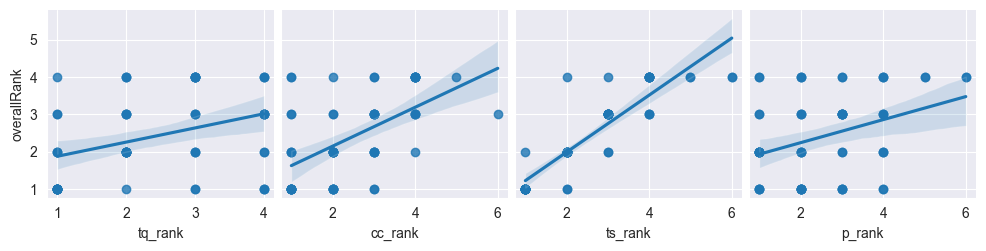

In [27]:
sns.pairplot(df_sub, x_vars=['tq_rank','cc_rank','ts_rank','p_rank'], y_vars='overallRank', kind='reg')

<AxesSubplot:>

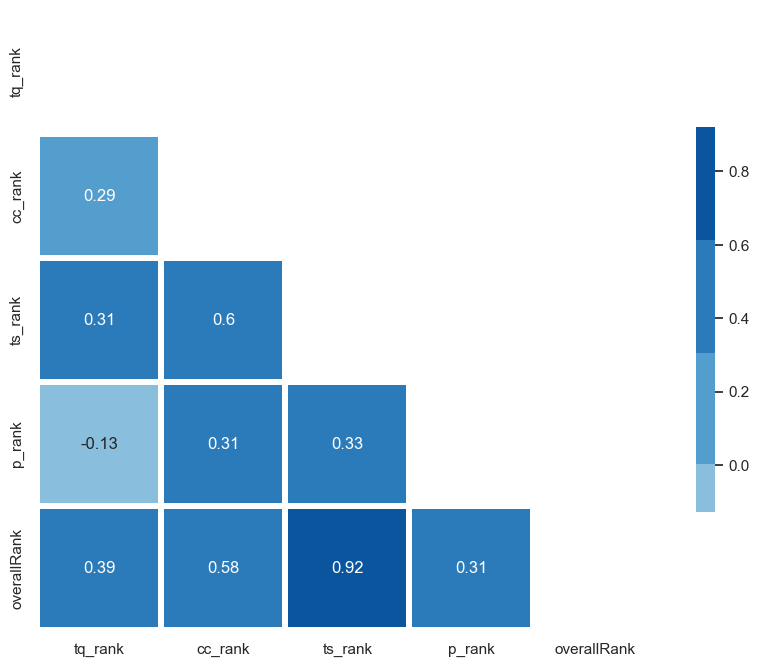

In [28]:
# correlation matrix of the dataframe
sns.set_theme(style='white')
corr = df_sub[['tq_rank','cc_rank','ts_rank','p_rank','overallRank']].corr(method='spearman')
mask = np.triu(corr)
f, ax = plt.subplots(figsize=(10,10))
cmap = sns.color_palette('Blues')
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=3, cbar_kws={'shrink': .5}, annot=True)

In [29]:
# R value is between -1 and 1, or correlation coefficient matrix, uses Pearson unlike above which uses spearman
# measures the direction and magnitude of the relationship between variables
np.corrcoef(df_sub['ts_rank'], df_sub['overallRank'])

array([[1.        , 0.89196937],
       [0.89196937, 1.        ]])

In [30]:
# covariance matrix, describes the directional relationship of linearity between two variables to determine where a linear relationship exists
df_sub.cov()

,tq_calculated,ts_calculated,p_calculated,cc_calculated,tq_rank,cc_rank,ts_rank,p_rank,overallRank,total_score,count
tq_calculated,27.524386,27.083853,1.780065,-7.822133,-1.895330,-0.349361,-0.741692,0.430553,-0.842776,48.566171,0.0
ts_calculated,27.083853,134.907146,34.344918,28.396916,-1.774964,-4.503352,-9.030823,-5.550904,-6.218932,224.732833,0.0
p_calculated,1.780065,34.344918,17.036536,24.820897,-0.498242,-1.669022,-2.380945,-2.842821,-1.350208,77.982415,0.0
cc_calculated,-7.822133,28.396916,24.820897,170.956844,-2.226678,-6.439855,-5.109892,-4.305585,-3.591420,216.352523,0.0
tq_rank,-1.895330,-1.774964,-0.498242,-2.226678,1.246288,0.416027,0.396057,-0.152330,0.472094,-6.395214,0.0
cc_rank,-0.349361,-4.503352,-1.669022,-6.439855,0.416027,1.479775,0.939068,0.584229,0.770865,-12.961590,0.0
ts_rank,-0.741692,-9.030823,-2.380945,-5.109892,0.396057,0.939068,1.702509,0.815412,1.299283,-17.263352,0.0
p_rank,0.430553,-5.550904,-2.842821,-4.305585,-0.152330,0.584229,0.815412,1.702509,0.525090,-12.268757,0.0
overallRank,-0.842776,-6.218932,-1.350208,-3.591420,0.472094,0.770865,1.299283,0.525090,1.246288,-12.003336,0.0
total_score,48.566171,224.732833,77.982415,216.352523,-6.395214,-12.961590,-17.263352,-12.268757,-12.003336,567.633942,0.0


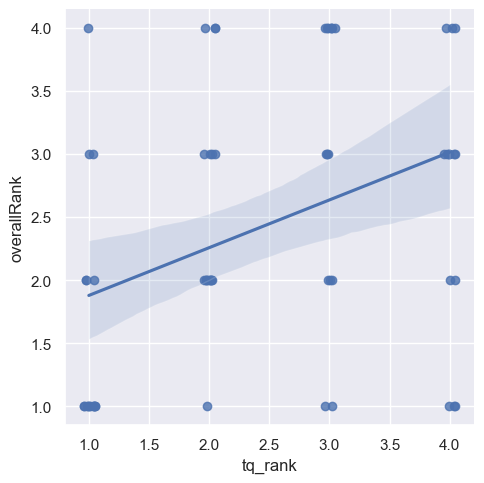

In [34]:
sns.lmplot(x='tq_rank',y='overallRank', data=df_sub,x_jitter=.05)

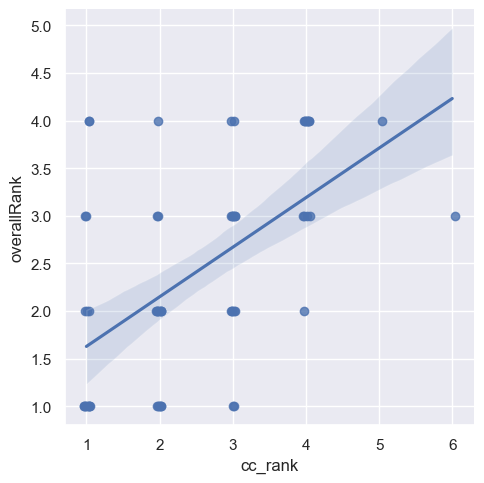

In [36]:
sns.lmplot(x='cc_rank',y='overallRank', data=df_sub,x_jitter=.05)

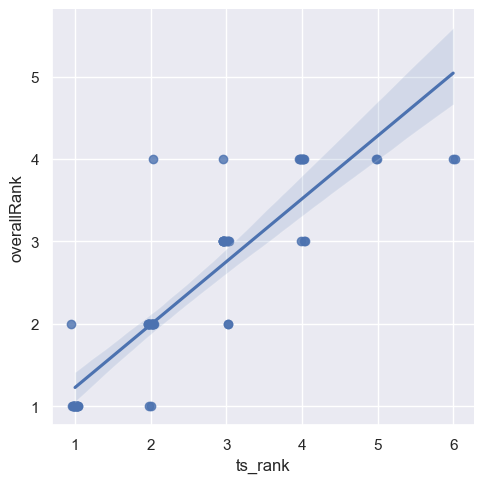

In [35]:
sns.lmplot(x='ts_rank',y='overallRank', data=df_sub,x_jitter=.05)

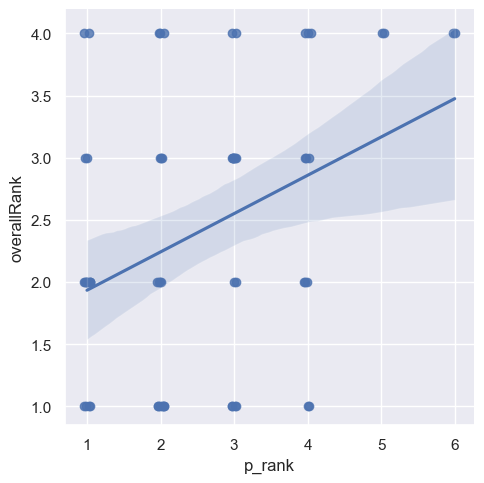

In [37]:
sns.lmplot(x='p_rank',y='overallRank', data=df_sub,x_jitter=.05)